<center><b>Question 1</b></center>

In [4]:
# Creating Parent Class Vehicle
class Vehicle:
    def __init__(self, plate_number, owner, engine_cc, base_tax):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_cc = engine_cc
        self.base_tax = base_tax

    def calculate_tax(self):
        return self.base_tax 
    
# Creating Child Classes
class Car(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, passenger_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.passenger_capacity = passenger_capacity
    def calculate_tax(self):
        try:
            return self.base_tax + (self.engine_cc * 0.05)
        except TypeError:
            raise ValueError("Engine cc must be a number")

class Truck(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, load_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.load_capacity = load_capacity
    def calculate_tax(self):
        try:
            return self.base_tax + (self.load_capacity * 0.1) 
        except TypeError:
            raise ValueError("Engine cc and load capacity must be numbers")
class Motorbike(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, type):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.type = type
    def calculate_tax(self):
        return self.base_tax + 20000

  # Creating instances and demonstrating polymorphism      
try:
    vehicles = [
        Car("UAY123A", "John Tebasiima", 1800, 300000, 5),
        Truck("UBF999K", "Kato Moses", 3000, 500000, 8000),
        Motorbike("UDF450T", "Sarah Namara", 150, 100000, "boda")
    ]

    # Demonstrate polymorphism
    print("   Vehicle Tax Calculations    \n")
    for v in vehicles:
        print(f"{v.owner}'s {v.__class__.__name__} ({v.plate_number}): UGX {v.calculate_tax():,.0f}")

except Exception as e:
    print(f"Error creating vehicles: {e}")


   Vehicle Tax Calculations    

John Tebasiima's Car (UAY123A): UGX 300,090
Kato Moses's Truck (UBF999K): UGX 500,800
Sarah Namara's Motorbike (UDF450T): UGX 120,000


In [6]:
#Saving records as JSON file
import json

# Convert vehicle objects to dictionaries
vehicle_records = []
for v in vehicles:
    record = {
        "type": v.__class__.__name__,
        "plate_number": v.plate_number,
        "owner": v.owner,
        "engine_cc": v.engine_cc,
        "base_tax": v.base_tax,
        "calculated_tax": v.calculate_tax()
    }
    
    # Add specific attributes based on vehicle type
    if isinstance(v, Car):
        record["passenger_capacity"] = v.passenger_capacity
    elif isinstance(v, Truck):
        record["load_capacity"] = v.load_capacity
    elif isinstance(v, Motorbike):
        record["type"] = v.type
        
    vehicle_records.append(record)

# Save to JSON file
try:
    with open('Vehicle_registry.json', 'w') as f:
        json.dump(vehicle_records, f, indent=4)
    print("Vehicle records saved successfully to Vehicle_registry.json")
except Exception as e:
    print(f"Error saving to file: {e}")

Vehicle records saved successfully to Vehicle_registry.json


<center><b>Question 2</b></center>

In [8]:
from abc import ABC, abstractmethod
import requests

class Member(ABC):
    def __init__(self, name, id_no, savings_balance):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings_balance
    
    @abstractmethod
    def loan_eligibility(self):
        pass
    
    @staticmethod
    def get_exchange_rate():
        try:
            response = requests.get("https://api.exchangerate.host/latest?base=USD&symbols=UGX")
            data = response.json()
            return data['rates']['UGX']
        except requests.RequestException as e:
            raise ConnectionError(f"Network error: {e}")
        except (KeyError, ValueError) as e:
            raise ValueError(f"Error processing exchange rate data: {e}")

class FarmerMember(Member):
    def loan_eligibility(self):
        loan_amount_ugx = self.savings_balance * 6
        try:
            rate = self.get_exchange_rate()
            loan_amount_usd = loan_amount_ugx / rate
            return {
                'UGX': loan_amount_ugx,
                'USD': round(loan_amount_usd, 2)
            }
        except Exception as e:
            return {
                'UGX': loan_amount_ugx,
                'USD': 'Unable to calculate USD amount'
            }

class TraderMember(Member):
    def loan_eligibility(self):
        loan_amount_ugx = self.savings_balance * 4
        try:
            rate = self.get_exchange_rate()
            loan_amount_usd = loan_amount_ugx / rate
            return {
                'UGX': loan_amount_ugx,
                'USD': round(loan_amount_usd, 2)
            }
        except Exception as e:
            return {
                'UGX': loan_amount_ugx,
                'USD': 'Unable to calculate USD amount'
            }

# Testing the implementation
try:
    # Create some members
    farmer = FarmerMember("John Tebasiima", "ID123", 1000000)
    trader = TraderMember("Ann Grace Apio", "ID456", 1000000)
    
    # Calculate and display loan eligibility
    print("\nLoan Eligibility Calculator\n")
    
    for member in [farmer, trader]:
        eligibility = member.loan_eligibility()
        print(f"{member.name} ({member.__class__.__name__}):")
        print(f"Savings: UGX {member.savings_balance:,}")
        print(f"Loan Eligibility:")
        print(f"  UGX: {eligibility['UGX']:,}")
        print(f"  USD: {eligibility['USD']:,}" if isinstance(eligibility['USD'], (int, float)) else f"  USD: {eligibility['USD']}")
        print()

except Exception as e:
    print(f"An error occurred: {e}")


Loan Eligibility Calculator

John Tebasiima (FarmerMember):
Savings: UGX 1,000,000
Loan Eligibility:
  UGX: 6,000,000
  USD: Unable to calculate USD amount

Ann Grace Apio (TraderMember):
Savings: UGX 1,000,000
Loan Eligibility:
  UGX: 4,000,000
  USD: Unable to calculate USD amount



<center><b>Question 3</b></center>

In [10]:
import time
from datetime import datetime
import random

class TrafficLight:
    """Parent class representing a basic traffic light."""
    
    def __init__(self, location):
        self.__current_state = "RED"  # Private attribute
        self.location = location
    
    def turn_green(self):
        """Turn the traffic light green."""
        self.__current_state = "GREEN"
    
    def turn_red(self):
        """Turn the traffic light red."""
        self.__current_state = "RED"
    
    def status(self):
        """Return the current state of the traffic light."""
        return self.__current_state


class SmartTrafficLight(TrafficLight):
    """Child class representing a smart traffic light system that adapts based on car density."""
    
    def __init__(self, location):
        super().__init__(location)
        self.__min_green_duration = 30  # Minimum green light duration (seconds)
        self.__max_green_duration = 90  # Maximum green light duration (seconds)
    
    def __get_car_density(self):
        """Simulates sensor API call to get car density (0–100%)."""
        return random.randint(0, 100)
    
    def __calculate_duration(self, density):
        """Calculate light durations based on car density."""
        green_duration = int(
            self.__min_green_duration + 
            (density / 100) * (self.__max_green_duration - self.__min_green_duration)
        )
        red_duration = max(30, 120 - green_duration)
        return green_duration, red_duration
    
    def run_cycle(self, max_cycles=5):
        """
        Run the traffic light cycle for a specified number of times.
        Each cycle includes a green and red light phase.
        """
        cycle = 0
        while cycle < max_cycles:
            try:
                density = self.__get_car_density()
                green_duration, red_duration = self.__calculate_duration(density)
                current_time = datetime.now().strftime("%H:%M:%S")
                
                # --- Green Light Phase ---
                self.turn_green()
                print(f"[{current_time}] {self.location}: Green for {green_duration}s (Density: {density}%)")
                time.sleep(1)  # Reduced for demo (simulate green phase)
                
                # --- Red Light Phase ---
                self.turn_red()
                print(f"[{current_time}] {self.location}: Red for {red_duration}s\n")
                time.sleep(1)  # Reduced for demo (simulate red phase)
                
                cycle += 1  # Move to the next cycle
            
            except Exception as e:
                print(f"Error in traffic light cycle: {e}")
                break
        
        print("Traffic light simulation complete.")


# --- Demonstration code ---
if __name__ == "__main__":
    try:
        jinja_road = SmartTrafficLight("Jinja Road Junction")
        print("Starting Smart Traffic Light System (limited demo)...\n")
        jinja_road.run_cycle(max_cycles=5)  # Run 5 cycles
    except Exception as e:
        print(f"System error: {e}")


Starting Smart Traffic Light System (limited demo)...

[12:54:29] Jinja Road Junction: Green for 60s (Density: 50%)
[12:54:29] Jinja Road Junction: Red for 60s

[12:54:31] Jinja Road Junction: Green for 69s (Density: 66%)
[12:54:31] Jinja Road Junction: Red for 51s

[12:54:33] Jinja Road Junction: Green for 77s (Density: 79%)
[12:54:33] Jinja Road Junction: Red for 43s

[12:54:35] Jinja Road Junction: Green for 43s (Density: 23%)
[12:54:35] Jinja Road Junction: Red for 77s

[12:54:37] Jinja Road Junction: Green for 52s (Density: 37%)
[12:54:37] Jinja Road Junction: Red for 68s

Traffic light simulation complete.


<center><b>Question 4</b></center>

In [11]:
import json
from typing import List, Dict

class Student:
    def __init__(self, student_id: str, name: str, marks: Dict[str, float]):
        self.student_id = student_id
        self.name = name
        self.marks = marks or {}

    def total_marks(self) -> float:
        return sum(self.marks.values())

    def average(self) -> float:
        count = len(self.marks)
        return self.total_marks() / count if count else 0.0

    def grade(self) -> str:
        avg = self.average()
        if avg >= 80:
            return "A"
        if avg >= 70:
            return "B"
        if avg >= 60:
            return "C"
        if avg >= 50:
            return "D"
        return "F"

    def evaluate(self) -> str:
        # Polymorphic interface: coursework evaluation
        return (f"{self.name} (ID: {self.student_id}) — Total: {self.total_marks():.0f}, "
                f"Average: {self.average():.2f}, Grade: {self.grade()}")

    def to_dict(self) -> dict:
        return {
            "class": "Student",
            "student_id": self.student_id,
            "name": self.name,
            "marks": self.marks
        }

    @staticmethod
    def from_dict(data: dict):
        return Student(data["student_id"], data["name"], data.get("marks", {}))


class PostgraduateStudent(Student):
    def __init__(self, student_id: str, name: str, marks: Dict[str, float], research_topic: str, thesis_score: float = 0.0):
        super().__init__(student_id, name, marks)
        self.research_topic = research_topic
        self.thesis_score = thesis_score

    def evaluate_thesis(self) -> str:
        # Simple rule: Pass if thesis_score >= 70, otherwise Revise
        try:
            return "Pass" if float(self.thesis_score) >= 70.0 else "Revise"
        except (TypeError, ValueError):
            return "Revise"

    def evaluate(self) -> str:
        coursework = super().evaluate()
        thesis = f"Thesis ({self.research_topic}): {self.thesis_score} => {self.evaluate_thesis()}"
        return f"{coursework}\n  {thesis}"

    def to_dict(self) -> dict:
        base = super().to_dict()
        base["class"] = "PostgraduateStudent"
        base.update({
            "research_topic": self.research_topic,
            "thesis_score": self.thesis_score
        })
        return base

    @staticmethod
    def from_dict(data: dict):
        return PostgraduateStudent(
            data["student_id"],
            data["name"],
            data.get("marks", {}),
            data.get("research_topic", ""),
            data.get("thesis_score", 0.0)
        )


def save_students(filename: str, students: List[Student]):
    try:
        with open(filename, "w", encoding="utf-8") as f:
            json.dump([s.to_dict() for s in students], f, indent=2)
    except Exception as e:
        print(f"Error saving students: {e}")


def load_students(filename: str) -> List[Student]:
    loaded: List[Student] = []
    try:
        with open(filename, "r", encoding="utf-8") as f:
            items = json.load(f)
        for it in items:
            cls = it.get("class", "Student")
            if cls == "PostgraduateStudent":
                loaded.append(PostgraduateStudent.from_dict(it))
            else:
                loaded.append(Student.from_dict(it))
    except FileNotFoundError:
        print(f"{filename} not found. Returning empty list.")
    except Exception as e:
        print(f"Error loading students: {e}")
    return loaded


# ---- Demonstration ----
if __name__ == "__main__":
    s1 = Student("S1001", "Alice Kyomuhangi", {"Math": 85, "CS": 78, "Stats": 90})
    s2 = PostgraduateStudent("P2001", "Dr. Brian Okello", {"ResearchMethods": 75, "AdvancedStats": 82},
                             research_topic="Queueing Theory", thesis_score=73)

    students = [s1, s2]

    # Polymorphic display
    for s in students:
        print(s.evaluate())
        print()

    # Save to JSON and reload
    save_students("students.json", students)
    loaded = load_students("students.json")

    print("Loaded from JSON:")
    for s in loaded:
        print(s.evaluate())
        print()

Alice Kyomuhangi (ID: S1001) — Total: 253, Average: 84.33, Grade: A

Dr. Brian Okello (ID: P2001) — Total: 157, Average: 78.50, Grade: B
  Thesis (Queueing Theory): 73 => Pass

Loaded from JSON:
Alice Kyomuhangi (ID: S1001) — Total: 253, Average: 84.33, Grade: A

Dr. Brian Okello (ID: P2001) — Total: 157, Average: 78.50, Grade: B
  Thesis (Queueing Theory): 73 => Pass



<center><b>Question 5</b></center>

        artist           track_name  play_count  popularity
0        Azawi            Quinamino     3200000          78
1        Azawi               Kawala     1100000          65
2      Sheebah               Nkwata     2500000          72
3      Sheebah            Kunyumiza      900000          60
4  Spice Diana  Spice Diana - Hit 1      100000          50


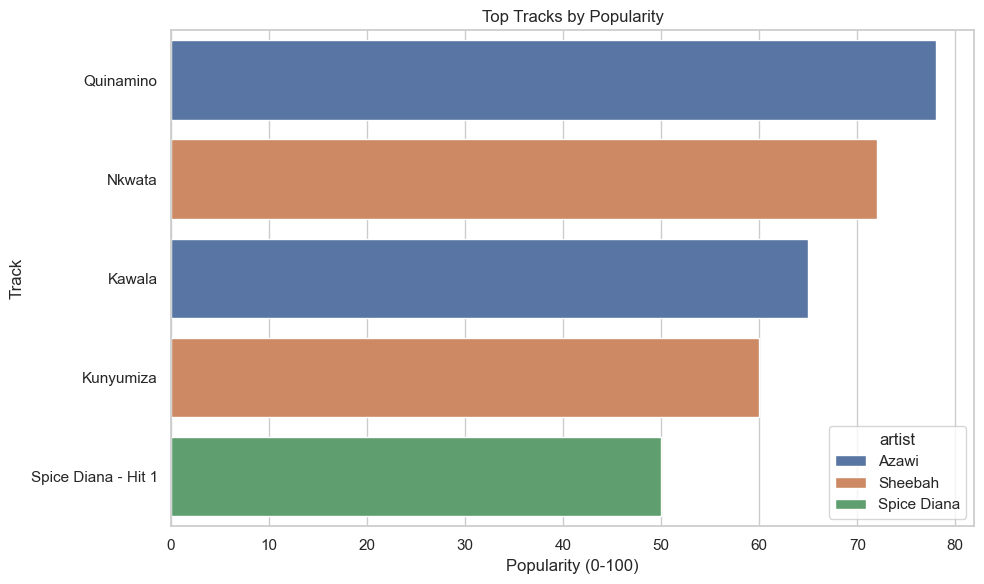

Uganda-only tracks: [{'artist': 'Azawi', 'track_name': 'Quinamino', 'play_count': 3200000, 'popularity': 78, 'country': 'Uganda', 'release_date': '2020-05-01'}, {'artist': 'Azawi', 'track_name': 'Kawala', 'play_count': 1100000, 'popularity': 65, 'country': 'Uganda', 'release_date': '2019-03-15'}]


In [12]:
# ...existing code...
import json
from typing import List, Dict, Optional

# Optional external libs
try:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
except Exception as e:
    raise ImportError("Please install pandas, seaborn, matplotlib to run analytics") from e

# Optional Spotipy support
try:
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials
except ImportError:
    spotipy = None  # will use mock data if not available

class UgandaMusicAnalytics:
    """
    Fetch top tracks for Ugandan artists (spotipy if configured) or use mock data.
    Methods:
      - fetch_top_tracks(artist_names, use_api=False, client_id=None, client_secret=None)
      - to_dataframe(tracks)
      - plot_popularity(df, top_n=10)
      - save_json(tracks, filename)
    """
    def __init__(self):
        self.tracks: List[Dict] = []

    def _mock_data_for(self, artist: str) -> List[Dict]:
        # Minimal realistic mock entries: track_name, play_count, popularity (0-100), country
        samples = {
            "Azawi": [
                {"artist": "Azawi", "track_name": "Quinamino", "play_count": 3_200_000, "popularity": 78, "country": "Uganda", "release_date": "2020-05-01"},
                {"artist": "Azawi", "track_name": "Kawala", "play_count": 1_100_000, "popularity": 65, "country": "Uganda", "release_date": "2019-03-15"},
            ],
            "Sheebah": [
                {"artist": "Sheebah", "track_name": "Nkwata", "play_count": 2_500_000, "popularity": 72, "country": "Uganda", "release_date": "2018-08-10"},
                {"artist": "Sheebah", "track_name": "Kunyumiza", "play_count": 900_000, "popularity": 60, "country": "Uganda", "release_date": "2017-02-20"},
            ],
        }
        return samples.get(artist, [
            {"artist": artist, "track_name": f"{artist} - Hit 1", "play_count": 100_000, "popularity": 50, "country": "Uganda", "release_date": "2021-01-01"}
        ])

    def fetch_top_tracks(self, artist_names: List[str], use_api: bool = False,
                         client_id: Optional[str] = None, client_secret: Optional[str] = None,
                         top_n_per_artist: int = 5) -> List[Dict]:
        self.tracks = []
        if use_api:
            if spotipy is None:
                raise RuntimeError("spotipy not installed; set use_api=False or install spotipy")
            if not client_id or not client_secret:
                raise ValueError("client_id and client_secret are required for API usage")

            try:
                auth = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
                sp = spotipy.Spotify(client_credentials_manager=auth, requests_timeout=10, retries=1)
            except Exception as e:
                # Authentication or network failure
                raise RuntimeError(f"Spotify authentication/connection failed: {e}")

            for artist in artist_names:
                try:
                    results = sp.search(q=f'artist:{artist}', type='artist', limit=1)
                    items = results.get('artists', {}).get('items', [])
                    if not items:
                        continue
                    artist_id = items[0]['id']
                    top = sp.artist_top_tracks(artist_id, country='UG')  # may be limited by API
                    for t in top.get('tracks', [])[:top_n_per_artist]:
                        self.tracks.append({
                            "artist": artist,
                            "track_name": t.get('name'),
                            "play_count": t.get('popularity', 0) * 10000,  # Spotify doesn't provide play_count; approximate for demo
                            "popularity": t.get('popularity', 0),
                            "country": "Uganda",
                            "release_date": t.get('album', {}).get('release_date')
                        })
                except spotipy.SpotifyException as e:
                    # Handle invalid token, rate limit, etc.
                    raise RuntimeError(f"Spotify API error for artist {artist}: {e}")
                except Exception as e:
                    # Generic catch - continue to next artist
                    print(f"Warning: could not fetch for {artist}: {e}")
        else:
            # Use mock data
            for artist in artist_names:
                self.tracks.extend(self._mock_data_for(artist)[:top_n_per_artist])

        return self.tracks

    def to_dataframe(self, tracks: Optional[List[Dict]] = None):
        tracks = tracks if tracks is not None else self.tracks
        if not tracks:
            return pd.DataFrame(columns=["artist", "track_name", "play_count", "popularity", "country", "release_date"])
        df = pd.DataFrame(tracks)
        # Ensure types
        df["play_count"] = pd.to_numeric(df["play_count"], errors="coerce").fillna(0).astype(int)
        df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce").fillna(0).astype(int)
        return df

    def plot_popularity(self, df: "pd.DataFrame", top_n: int = 10, figsize=(10,6)):
        if df.empty:
            print("No data to plot")
            return
        df_sorted = df.sort_values("popularity", ascending=False).head(top_n)
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=figsize)
        ax = sns.barplot(data=df_sorted, x="popularity", y="track_name", hue="artist", dodge=False)
        ax.set_title("Top Tracks by Popularity")
        ax.set_xlabel("Popularity (0-100)")
        ax.set_ylabel("Track")
        plt.tight_layout()
        plt.show()

    def save_json(self, filename: str = "uganda_music_analytics.json"):
        try:
            with open(filename, "w", encoding="utf-8") as f:
                json.dump(self.tracks, f, indent=2, ensure_ascii=False)
        except Exception as e:
            raise IOError(f"Failed to save JSON: {e}")

class LocalArtistAnalytics(UgandaMusicAnalytics):
    """Filters to tracks produced in Uganda only (expects 'country' field)."""
    def filter_uganda(self, tracks: Optional[List[Dict]] = None) -> List[Dict]:
        tracks = tracks if tracks is not None else self.tracks
        return [t for t in tracks if str(t.get("country", "")).lower() == "uganda"]

# ---- Demo usage (mock) ----
if __name__ == "__main__":
    analytics = UgandaMusicAnalytics()
    artists = ["Azawi", "Sheebah", "Spice Diana"]
    tracks = analytics.fetch_top_tracks(artists, use_api=False)
    df = analytics.to_dataframe(tracks)
    print(df[["artist","track_name","play_count","popularity"]])
    analytics.plot_popularity(df, top_n=6)
    analytics.save_json("uganda_music_analytics.json")

    # Local filter demo
    local = LocalArtistAnalytics()
    local.fetch_top_tracks(["Azawi"], use_api=False)
    uganda_only = local.filter_uganda()
    print("Uganda-only tracks:", uganda_only)
# ...existing code...

<center><b> Question 6</b></center>

In [13]:
# exchange_pipeline.py or in Jupyter cell

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

class ExchangeRatePipeline:
    """
    Pipeline to fetch, clean, analyze and export exchange rate data.
    """

    def __init__(self, local_json_path: str = None, api_url: str = None):
        self.local_json_path = local_json_path
        self.api_url = api_url
        self.df = None

    def fetch_data(self):
        """
        Fetch data from API if api_url provided else load from local JSON.
        """
        try:
            if self.api_url:
                response = requests.get(self.api_url, timeout=10)
                response.raise_for_status()
                data = response.json()
            elif self.local_json_path:
                with open(self.local_json_path, 'r') as f:
                    data = json.load(f)
            else:
                raise ValueError("No source provided: either api_url or local_json_path must be set.")
            
            return data

        except requests.exceptions.RequestException as e:
            print(f"Network error when fetching data: {e}")
            raise
        except json.JSONDecodeError as e:
            print(f"JSON decoding error: {e}")
            raise
        except Exception as e:
            print(f"Unexpected error: {e}")
            raise

    def clean_transform(self, data):
        """
        Clean raw JSON into a pandas DataFrame, convert types, handle missing values.
        """
        # Convert to DataFrame
        try:
            df = pd.DataFrame(data)
        except Exception as e:
            print(f"Error converting to DataFrame: {e}")
            raise

        # Convert date column to datetime
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        else:
            raise KeyError("Missing 'date' field in data")

        # Set date as index
        df = df.set_index('date').sort_index()

        # Check for missing values
        if df.isnull().values.any():
            print("Warning: missing values found. Filling with forward fill.")
            df = df.fillna(method='ffill')

        self.df = df
        return df

    def compute_monthly_averages(self):
        """
        Compute monthly average exchange rates using numpy / pandas.
        """
        if self.df is None:
            raise ValueError("DataFrame is not set. Run clean_transform first.")

        # Resample monthly and compute mean
        monthly_avg = self.df.resample('M').mean()
        # Optionally convert to numpy array or use numpy for more analysis
        arr = monthly_avg.to_numpy()
        print("Monthly averages (numpy array):", arr)
        return monthly_avg

    def plot_trends(self, monthly_avg):
        """
        Plot the exchange rate trends for USD, GBP, EUR.
        """
        plt.figure(figsize=(10,6))
        for col in monthly_avg.columns:
            plt.plot(monthly_avg.index, monthly_avg[col], marker='o', label=col)
        
        plt.title("Monthly Average Exchange Rates (UGX per Unit)")
        plt.xlabel("Month")
        plt.ylabel("Rate (UGX)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def export_data(self, df_to_export, csv_path: str, json_path: str):
        """
        Export the processed data to CSV and JSON.
        """
        try:
            # CSV export
            df_to_export.to_csv(csv_path)
            # JSON export
            df_to_export.reset_index().to_json(json_path, orient='records', date_format='iso')
            print(f"Exported data to {csv_path} and {json_path}")
        except Exception as e:
            print(f"Error exporting data: {e}")
            raise

    def run_pipeline(self, csv_path: str, json_path: str):
        """
        Full pipeline: fetch -> clean -> compute -> plot -> export
        """
        data = self.fetch_data()
        df_clean = self.clean_transform(data)
        monthly_avg = self.compute_monthly_averages()
        self.plot_trends(monthly_avg)
        self.export_data(monthly_avg, csv_path, json_path)


# --- Example usage ---
if __name__ == "__main__":
    try:
        pipeline = ExchangeRatePipeline(local_json_path="exchange_rates.json", api_url=None)
        pipeline.run_pipeline(csv_path="monthly_avg_rates.csv", json_path="monthly_avg_rates.json")
    except Exception as e:
        print(f"Pipeline failed with error: {e}")


Unexpected error: [Errno 2] No such file or directory: 'exchange_rates.json'
Pipeline failed with error: [Errno 2] No such file or directory: 'exchange_rates.json'


Failed to locate the BOU JSON exchange rates, tried to scrape this site and manupulate it but it offers only static exchange rates

In [15]:
url = "https://bou.or.ug/bouwebsite/bouwebsitecontent/ExchangeRates/scripts.MajorExchangeRates/index.jsp"
response = requests.get(url)
if response.status_code == 200:
    with open("exchange_rates.json", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("Exchange rates data saved to exchange_rates.json")

Exchange rates data saved to exchange_rates.json


In [17]:
import pandas as pd

url = "https://bou.or.ug/bouwebsite/bouwebsitecontent/ExchangeRates/scripts.MajorExchangeRates/index.jsp?year=2025&month=Oct&day=31"

try:
    # Read all HTML tables from the page
    tables = pd.read_html(url)
    
    # Usually, the first or second table has the exchange rates
    print(f"Number of tables found: {len(tables)}")
    df = tables[0]
    
    print("Extracted table:")
    print(df.head(20))

except Exception as e:
    print("Error fetching or parsing table:", e)


Number of tables found: 1
Extracted table:
          DATE                              CURRENCY   U.S DOLLAR  \
0   31/10/2025     U.S.DOLLAR/UGANDA SHILLINGS (UGX)            1   
1   31/10/2025      POUND STERLING (GBP)/U.S. DOLLAR       1.3152   
2   31/10/2025         U.S. DOLLAR/SWISS FRANC (CHF)      0.80175   
3   31/10/2025        U.S. DOLLAR/JAPANESE YEN (JPY)      153.885   
4   31/10/2025                       SDR/U.S. DOLLAR     1.360005   
5   31/10/2025    AUSTRALIAN DOLLAR (AUD)/U.S DOLLAR       0.6544   
6   31/10/2025     U.S. DOLLAR/CANADIAN DOLLAR (CAD)      1.39895   
7   31/10/2025       U.S. DOLLAR/SWEDISH KRONE (SEK)      9.44125   
8   31/10/2025     U.S. DOLLAR/NORWEGIAN KRONE (NOK)      10.0578   
9   31/10/2025        U.S. DOLLAR/DANISH KRONE (DKK)       6.4551   
10  31/10/2025                        EURO/US DOLLAR       1.1568   
11  31/10/2025    NEWZEALAND DOLLAR (NZD)/U.S.DOLLAR      0.57255   
12  31/10/2025     U.S. DOLLAR/KENYA SHILLINGS (KES)        